In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,75)

In [2]:
class evaluation:
    def __init__(self, true_s):
        self.true_df = pd.DataFrame(true_s)
        self.true_df.columns = ['swell']
        self.true_df['swell(t+1)'] = self.true_df['swell'].shift(-1)
        self.true_df['swell(t+2)'] = self.true_df['swell'].shift(-2)
        self.true_df['swell(t-1)'] = self.true_df['swell'].shift(1)
        self.true_df['swell(t-2)'] = self.true_df['swell'].shift(2)
    
        self.swell_columns = ['swell(t+1)','swell(t+2)','swell(t-1)','swell(t-2)']
    
    def _eval_one(self, pred):
        true = self.true_df.loc[pred.name]
        swell = true['swell'] 
        p_swell = pred['pred']

        if swell == 0 and p_swell == 0:
            return 1

        if swell == 1 and p_swell == 1:
            return 2

        if swell == 0 and p_swell == 1:
            if (true[self.swell_columns].values == 1).any():
                return 0
            else:
                return -1

        if swell == 1 and p_swell == 0:
            if (pred[self.swell_columns].values == 1).any():
                return 0
            else: 
                return -2
    
    def evaluate(self, pred):
        pred_df = pd.DataFrame(pred)
        pred_df.columns = ['pred']
        pred_df['swell(t+1)'] = pred_df['pred'].shift(-1)
        pred_df['swell(t+2)'] = pred_df['pred'].shift(-2)
        pred_df['swell(t-1)'] = pred_df['pred'].shift(1)
        pred_df['swell(t-2)'] = pred_df['pred'].shift(2)

        result = []
        for index in pred_df.index:
            result.append(self._eval_one(pred_df.loc[index]))
        
        #print(result)
        print(pd.Series(result).value_counts())
        
        return np.sum(result)

In [3]:
num_values = 7
degrees_week = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_week)
sin_week = np.sin(np.deg2rad(degrees_week))
print(sin_week)
cos_week = np.cos(np.deg2rad(degrees_week))
print(cos_week)

num_values = 12
degrees_month = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_month)
sin_month = np.sin(np.deg2rad(degrees_month))
print(sin_month)
cos_month = np.cos(np.deg2rad(degrees_month))
print(cos_month)

num_values = 31
degrees_day = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_day)
sin_day = np.sin(np.deg2rad(degrees_day))
print(sin_day)
cos_day = np.cos(np.deg2rad(degrees_day))
print(cos_day)

num_values = 24
degrees_hour = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_hour)
sin_hour = np.sin(np.deg2rad(degrees_hour))
print(sin_hour)
cos_hour = np.cos(np.deg2rad(degrees_hour))
print(cos_hour)

[   0.           51.42857143  102.85714286  154.28571429  205.71428571
  257.14285714  308.57142857]
[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.]
[  0.00000000e+00   5.00000000e-01   8.66025404e-01   1.00000000e+00
   8.66025404e-01   5.00000000e-01   1.22464680e-16  -5.00000000e-01
  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01  -5.00000000e-01]
[  1.00000000e+00   8.66025404e-01   5.00000000e-01   6.12323400e-17
  -5.00000000e-01  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01
  -5.00000000e-01  -1.83697020e-16   5.00000000e-01   8.66025404e-01]
[   0.           11.61290323   23.22580645   34.83870968   46.4516129
   58.06451613   69.67741935   81.29032258   92.90322581  104.51612903
  116.12903226  127.74193548  139.35483871  150.96774194  162.58064516
  174.19354839  185.806

In [4]:
def make_coord(date,num_class):
    # 1 ~ 12, 1 ~ 7, 1 ~ 31
    degrees = np.linspace(0,360,num_values + 1)[:-1]
    sin = np.sin(np.deg2rad(degrees))
    cos = np.cos(np.deg2rad(degrees))
    return sin, cos


def date2coord(date, sin, cos):
    return cos[date-1], sin[date-1]


def date2week(x):
    y = int(str(x)[:4])
    m = int(str(x)[4:6])
    d = int(str(x)[6:8])
    day = datetime(y, m, d)
    return day.weekday()

In [5]:
df = pd.read_csv('./merged_info_data.tsv',sep='\t',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 65 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [6]:
df['swell'].value_counts()

0.0    31800
1.0     2592
Name: swell, dtype: int64

In [7]:
df['swell'] = df['swell'] + df['weather_deterioration']

In [8]:
df['swell'].value_counts()

0.0    26863
1.0     4937
2.0     2592
Name: swell, dtype: int64

In [9]:
df['month'] = df['hour'].apply(lambda x:int(str(x)[4:6]))
df['day'] = df['hour'].apply(lambda x:int(str(x)[6:8]))
df['day_hour'] = df['hour'].apply(lambda x:int((str(x)[8:])))
df['week'] = df['hour'].apply(date2week)
df['week'] = df['week'] + 1 
df['year'] = df['hour'].apply(lambda x:int(str(x)[:4]))

In [10]:
df['day_coord'] = df['day'].apply(date2coord, args=(sin_day, cos_day,))
df['month_coord'] = df['month'].apply(date2coord, args=(sin_month, cos_month))
df['week_coord'] = df['week'].apply(date2coord, args=(sin_week, cos_week,))
df['hour_coord'] = df['day_hour'].apply(date2coord, args=(sin_hour, cos_hour,))

In [11]:
s = (df[df['swell'].isnull()]['hour']//100).value_counts()
s

20170315    17
20171211    17
20161130    17
20170331    17
20141023    17
20161020    17
20140518    17
20170212    17
20150718    17
20140706    17
20150627    17
20160830    17
20171023    17
20171012    17
20141221    17
20170916    17
20160122    17
20150404    17
20150113    17
20140925    17
20170603    17
20161226    17
20151213    17
20160304    17
20151113    17
20160831     7
20170604     7
20171024     7
20140926     7
20171013     7
20150114     7
20141222     7
20151214     7
20150405     7
20150628     7
20140707     7
20150719     7
20170401     7
20171212     7
20170917     7
20151114     7
20170213     7
20140519     7
20160305     7
20161021     7
20170316     7
20161227     7
20161201     7
20160123     7
20141024     7
Name: hour, dtype: int64

In [12]:
s[s > 10].index.tolist()[0]

20170315

In [13]:
def get_prev_date(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return (today - timedelta(1)).strftime('%Y%m%d%H')

In [14]:
def get_today_from_07(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return today.strftime('%Y%m%d%H')

In [15]:
get_prev_date('20170101')

'2016123100'

In [16]:
get_today_from_07('20170101')

'2017010100'

In [17]:
s[s>10].index.astype(str).sort_values()

Index(['20140518', '20140706', '20140925', '20141023', '20141221', '20150113',
       '20150404', '20150627', '20150718', '20151113', '20151213', '20160122',
       '20160304', '20160830', '20161020', '20161130', '20161226', '20170212',
       '20170315', '20170331', '20170603', '20170916', '20171012', '20171023',
       '20171211'],
      dtype='object')

In [18]:
test_date_hour = []
for d in s[s>10].index.astype(str):
    #day = get_prev_date(d)
    day = get_prev_date(d)
    tomorrow_day = int(day) +  100 
    
    if tomorrow_day == 2016113100:
        tomorrow_day = 2016120100

    if tomorrow_day == 2017033200:
        tomorrow_day = 2017040100
        
    print(day, tomorrow_day)
    for hour in range(7,24):
        test_date_hour.append((int(day) + hour))
            
    for hour in range(0,7):
        test_date_hour.append((tomorrow_day + hour))

test_date_hour = list(map(str,test_date_hour))
len(test_date_hour)

2017031400 2017031500
2017121000 2017121100
2016112900 2016113000
2017033000 2017033100
2014102200 2014102300
2016101900 2016102000
2014051700 2014051800
2017021100 2017021200
2015071700 2015071800
2014070500 2014070600
2015062600 2015062700
2016082900 2016083000
2017102200 2017102300
2017101100 2017101200
2014122000 2014122100
2017091500 2017091600
2016012100 2016012200
2015040300 2015040400
2015011200 2015011300
2014092400 2014092500
2017060200 2017060300
2016122500 2016122600
2015121200 2015121300
2016030300 2016030400
2015111200 2015111300


600

In [19]:
df['swell(t+1)'] = df['swell'].shift(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 75 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [20]:
df.columns

Index(['hour', 'climate', 'weather_deterioration', 'swell',
       '21229_GUST풍속 1(m/s)', '21229_GUST풍속(m/s)', '21229_기온(°C)',
       '21229_수온(°C)', '21229_습도(%)', '21229_유의파고(m)', '21229_일시',
       '21229_최대파고(m)', '21229_파주기(sec)', '21229_파향(deg)', '21229_평균파고(m)',
       '21229_풍속(m/s)', '21229_풍속1(m/s)', '21229_풍향(deg)', '21229_풍향1(deg)',
       '21229_현지기압(hPa)', '22105_GUST풍속 1(m/s)', '22105_GUST풍속(m/s)',
       '22105_기온(°C)', '22105_수온(°C)', '22105_습도(%)', '22105_유의파고(m)',
       '22105_일시', '22105_최대파고(m)', '22105_파주기(sec)', '22105_파향(deg)',
       '22105_평균파고(m)', '22105_풍속(m/s)', '22105_풍속1(m/s)', '22105_풍향(deg)',
       '22105_풍향1(deg)', '22105_현지기압(hPa)', '22106_GUST풍속 1(m/s)',
       '22106_GUST풍속(m/s)', '22106_기온(°C)', '22106_수온(°C)', '22106_습도(%)',
       '22106_유의파고(m)', '22106_일시', '22106_최대파고(m)', '22106_파주기(sec)',
       '22106_파향(deg)', '22106_평균파고(m)', '22106_풍속(m/s)', '22106_풍속1(m/s)',
       '22106_풍향(deg)', '22106_풍향1(deg)', '22106_현지기압(hPa)', '22190_일시',
   

In [21]:
def output_change(x):
    if x == 2:
        return 1
    else:
        return 0

In [22]:
df['hour'] = df['hour'].astype(str)
df['index'] = df.index
df.set_index('hour',inplace=True,)

In [23]:
scale_features = ['22105_파주기(sec)','22106_파주기(sec)','21229_파주기(sec)']
# ['21229_파주기(sec)']
#['22106_파주기(sec)']
#['21229_파주기(sec)'],'22105_파주기(sec)','22106_파주기(sec)']#,'22106_현지기압(hPa)']
#['swell']#,'22453_파주기(sec)','22106_파주기(sec)','22106_현지기압(hPa)']
nor_features = []#['month_coord']#,'hour_coord']
index_feature = ['index']
target = ['swell(t+1)']

In [24]:
minmax_scaler = MinMaxScaler(copy=True, feature_range=(0,1))
temp_df = df[index_feature+scale_features+nor_features+target]

minmax_scaler.fit(temp_df[scale_features].dropna())
    
train = temp_df[index_feature+scale_features+nor_features + target].drop(test_date_hour).dropna()
test = temp_df[index_feature+scale_features+nor_features + target].loc[test_date_hour]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32244 entries, 2014010407 to 2017123123
Data columns (total 5 columns):
index             32244 non-null int64
22105_파주기(sec)    32244 non-null float64
22106_파주기(sec)    32244 non-null float64
21229_파주기(sec)    32244 non-null float64
swell(t+1)        32244 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 5 columns):
index             600 non-null int64
22105_파주기(sec)    575 non-null float64
22106_파주기(sec)    590 non-null float64
21229_파주기(sec)    598 non-null float64
swell(t+1)        575 non-null float64
dtypes: float64(4), int64(1)
memory usage: 28.1+ KB


In [25]:
test.fillna(method='ffill',inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 5 columns):
index             600 non-null int64
22105_파주기(sec)    600 non-null float64
22106_파주기(sec)    600 non-null float64
21229_파주기(sec)    600 non-null float64
swell(t+1)        600 non-null float64
dtypes: float64(4), int64(1)
memory usage: 28.1+ KB


In [26]:
#test['swell(t+1)']=np.NaN

In [27]:
test.sort_index(inplace=True)

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [29]:
pred_result = []
for index in test.index:
    order_index = test.loc[index]['index']
    print(index, order_index)
    train_before_test = train[train['index']<order_index]
    print(len(train_before_test))
    test_row = pd.DataFrame(test.loc[index]).T
    cluster_df = pd.concat([train_before_test,test_row])
#     cluster_df.iloc[-1,1] = cluster_df.iloc[-2,1]
#     test.loc[index,'swell'] = cluster_df.ix[-2,1]
    
    train_X = minmax_scale(cluster_df[scale_features].values)

    x_list = []
    for col in nor_features:
        X_arr = np.array(cluster_df[col].apply(lambda x:np.array(x)).tolist())
        x_list.append(X_arr)

    if len(nor_features) > 0:
        nor_X = np.concatenate(x_list,axis=1)
        train_X = np.concatenate([train_X,nor_X], axis=1)

    print(train_X.shape)
    K = 4

    kmeans = KMeans(n_clusters=K,max_iter=100000)
    pred = kmeans.fit_predict(train_X)
    print(pred)
    cluster_df['pred'] = pred
    print(cluster_df.groupby(['pred','swell(t+1)']).count()[['index']])
    
    pred_num = cluster_df['pred'].value_counts()
    
    swell_num = []
    for i in range(K):
        swell_num.append(len(cluster_df[(cluster_df['pred'] == i) & (cluster_df['swell(t+1)']==2)]))

    test_pred = int(cluster_df.loc[index]['pred'])
    print(test_pred , swell_num[test_pred] / pred_num.loc[test_pred])
    pred_result.append((test_pred , swell_num[test_pred] / pred_num.loc[test_pred]))

2014051707 3192.0
3138
(3139, 3)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0           392
     1.0            73
     2.0            27
1    0.0           378
     1.0           120
     2.0           155
2    0.0           853
     1.0           124
3    0.0           745
     1.0           190
     2.0            82
1 0.237366003063
2014051708 3193.0
3138
(3139, 3)
[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           745
     1.0           190
     2.0            82
1    0.0           853
     1.0           124
2    0.0           378
     1.0           120
     2.0           155
3    0.0           392
     1.0            73
     2.0            27
2 0.237366003063
2014051709 3194.0
3138
(3139, 3)
[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           378
     1.0           120
     2.0           155
1    0.0           392
     1.0            73
     2.0            27
2    0.0           745
     

[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           913
     1.0           224
     2.0            99
1    0.0          1019
     1.0           183
2    0.0           800
     1.0           178
     2.0            10
3    0.0           471
     1.0           130
     2.0           208
0 0.0800970873786
2014070508 4369.0
4234
(4235, 3)
[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           913
     1.0           224
     2.0            99
1    0.0          1018
     1.0           181
2    0.0           471
     1.0           130
     2.0           208
3    0.0           801
     1.0           180
     2.0            10
0 0.0800970873786
2014070509 4370.0
4234
(4235, 3)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          1019
     1.0           183
1    0.0           913
     1.0           224
     2.0            99
2    0.0           471
     1.0           130
     2.0           208
3    0.0     

[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           795
     1.0           177
     2.0            10
1    0.0           472
     1.0           131
     2.0           208
2    0.0           910
     1.0           223
     2.0            99
3    0.0          1026
     1.0           184
2 0.0803571428571
2014092407 6312.0
6036
(6037, 3)
[1 1 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          1296
     1.0           294
     2.0           146
1    0.0          1452
     1.0           514
     2.0            15
2    0.0          1348
     1.0           299
3    0.0           348
     1.0           106
     2.0           219
1 0.00757193336699
2014092408 6313.0
6036
(6037, 3)
[0 0 0 ..., 0 2 0]
                 index
pred swell(t+1)       
0    0.0          1096
     1.0           374
     2.0            10
1    0.0           517
     1.0           159
     2.0           264
2    0.0          1573
     1.0           382
     2.0    

[0 0 0 ..., 0 3 1]
                 index
pred swell(t+1)       
0    0.0          1086
     1.0           367
     2.0            10
1    0.0           543
     1.0           169
     2.0           267
2    0.0          1230
     1.0           289
     2.0           103
3    0.0          1585
     1.0           388
1 0.272727272727
2014102207 6984.0
6206
(6207, 3)
[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          1096
     1.0           368
     2.0            10
1    0.0          1611
     1.0           389
2    0.0          1306
     1.0           295
     2.0           104
3    0.0           576
     1.0           168
     2.0           284
2 0.0609970674487
2014102208 6985.0
6206
(6207, 3)
[2 2 2 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          1504
     1.0           359
1    0.0           577
     1.0           168
     2.0           284
2    0.0          1186
     1.0           393
     2.0            10
3    0.0      

[0 0 0 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          1096
     1.0           368
     2.0            10
1    0.0           576
     1.0           168
     2.0           284
2    0.0          1306
     1.0           295
     2.0           105
3    0.0          1611
     1.0           388
2 0.0615474794842
2014122007 8400.0
7404
(7405, 3)
[2 2 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          1732
     1.0           386
1    0.0          1624
     1.0           298
     2.0           164
2    0.0          1772
     1.0           577
     2.0            35
3    0.0           416
     1.0           120
     2.0           281
1 0.07861936721
2014122008 8401.0
7404
(7405, 3)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1732
     1.0           386
1    0.0           416
     1.0           120
     2.0           281
2    0.0          1624
     1.0           298
     2.0           164
3    0.0       

[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          1772
     1.0           577
     2.0            35
1    0.0          1733
     1.0           386
2    0.0           416
     1.0           120
     2.0           281
3    0.0          1624
     1.0           297
     2.0           164
3 0.0786570743405
2015011207 8952.0
7719
(7720, 3)
[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          1822
     1.0           583
     2.0            35
1    0.0           436
     1.0           120
     2.0           333
2    0.0          1758
     1.0           392
3    0.0          1760
     1.0           297
     2.0           184
3 0.0821062025881
2015011208 8953.0
7719
(7720, 3)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           444
     1.0           123
     2.0           335
1    0.0          1710
     1.0           380
2    0.0          1828
     1.0           298
     2.0           194
3    0.0     

[3 3 3 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          1710
     1.0           380
1    0.0          1827
     1.0           298
     2.0           194
2    0.0           444
     1.0           123
     2.0           336
3    0.0          1794
     1.0           591
     2.0            23
2 0.372093023256
2015040307 10896.0
9576
(9577, 3)
[2 2 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          2112
     1.0           425
1    0.0          2316
     1.0           354
     2.0           277
2    0.0          2110
     1.0           664
     2.0            25
3    0.0           652
     1.0           151
     2.0           491
1 0.0939938920937
2015040308 10897.0
9576
(9577, 3)
[0 0 0 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          2071
     1.0           655
     2.0            25
1    0.0          2316
     1.0           354
     2.0           277
2    0.0           652
     1.0           151
     2.0    

[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          2268
     1.0           341
     2.0           276
1    0.0          2190
     1.0           448
2    0.0           655
     1.0           151
     2.0           491
3    0.0          2078
     1.0           653
     2.0            26
0 0.0956672443674
2015062607 12912.0
11501
(11502, 3)
[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          3024
     1.0           566
1    0.0          1215
     1.0           282
     2.0           609
2    0.0          2568
     1.0           530
     2.0           181
3    0.0          1973
     1.0           541
     2.0            13
0 0.0
2015062608 12913.0
11501
(11502, 3)
[2 2 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          2510
     1.0           518
     2.0           178
1    0.0          3015
     1.0           565
2    0.0          1975
     1.0           542
     2.0            13
3    0.0          1

(11502, 3)
[0 0 0 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          2064
     1.0           567
     2.0            13
1    0.0          2600
     1.0           536
     2.0           181
2    0.0          2899
     1.0           533
3    0.0          1218
     1.0           282
     2.0           609
3 0.288762446657
2015071707 13416.0
11923
(11924, 3)
[2 2 2 ..., 1 3 1]
                 index
pred swell(t+1)       
0    0.0          3116
     1.0           616
1    0.0          1326
     1.0           307
     2.0           624
2    0.0          2028
     1.0           573
     2.0            13
3    0.0          2579
     1.0           564
     2.0           178
1 0.276473194506
2015071708 13417.0
11923
(11924, 3)
[1 1 1 ..., 2 0 2]
                 index
pred swell(t+1)       
0    0.0          2585
     1.0           564
     2.0           178
1    0.0          2056
     1.0           580
     2.0            13
2    0.0          1328
     1.0           30

(11924, 3)
[0 0 0 ..., 1 3 3]
                 index
pred swell(t+1)       
0    0.0          2123
     1.0           606
     2.0            13
1    0.0          1256
     1.0           293
     2.0           618
2    0.0          3002
     1.0           580
3    0.0          2668
     1.0           581
     2.0           184
3 0.0535974366443
2015111207 16248.0
14652
(14653, 3)
[2 2 2 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0           794
     1.0           259
     2.0           642
1    0.0          3418
     1.0           571
2    0.0          3608
     1.0           978
     2.0            23
3    0.0          3311
     1.0           713
     2.0           336
2 0.00499023649382
2015111208 16249.0
14652
(14653, 3)
[1 1 1 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          3310
     1.0           714
     2.0           336
1    0.0          3596
     1.0           972
     2.0            23
2    0.0          3431
     1.0          

0 0.0833126704686
2015111304 16269.0
14652
(14653, 3)
[0 0 0 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          3596
     1.0           972
     2.0            24
1    0.0           794
     1.0           259
     2.0           642
2    0.0          3310
     1.0           713
     2.0           336
3    0.0          3431
     1.0           576
0 0.00522648083624
2015111305 16270.0
14652
(14653, 3)
[2 2 2 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0           794
     1.0           259
     2.0           642
1    0.0          3486
     1.0           587
2    0.0          3619
     1.0           987
     2.0            25
3    0.0          3232
     1.0           687
     2.0           335
3 0.0787494123178
2015111306 16271.0
14652
(14653, 3)
[3 3 3 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0           797
     1.0           259
     2.0           642
1    0.0          3523
     1.0           610
2    0.0          328

[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           780
     1.0           278
     2.0           712
1    0.0          3596
     1.0           641
2    0.0          3143
     1.0           714
     2.0           371
3    0.0          3984
     1.0          1057
     2.0            40
0 0.402259887006
2015121303 16988.0
15315
(15316, 3)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          3550
     1.0           634
1    0.0          3354
     1.0           767
     2.0           379
2    0.0           796
     1.0           283
     2.0           718
3    0.0          3803
     1.0          1006
     2.0            26
2 0.399554813578
2015121304 16989.0
15315
(15316, 3)
[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           780
     1.0           278
     2.0           712
1    0.0          3599
     1.0           641
2    0.0          3981
     1.0          1057
     2.0            40
3    0.0 

[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          3599
     1.0           783
     2.0           379
1    0.0          3686
     1.0           661
2    0.0           812
     1.0           297
     2.0           743
3    0.0          4208
     1.0          1030
     2.0            26
2 0.401187904968
2016012201 17946.0
16223
(16224, 3)
[2 2 2 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          3739
     1.0           672
1    0.0          3365
     1.0           729
     2.0           373
2    0.0          4406
     1.0          1079
     2.0            38
3    0.0           795
     1.0           291
     2.0           737
3 0.404278661547
2016012202 17947.0
16223
(16224, 3)
[2 2 2 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          3739
     1.0           672
1    0.0           795
     1.0           291
     2.0           736
2    0.0          4406
     1.0          1079
     2.0            38
3    0.0 

[0 0 0 ..., 1 0 0]
                 index
pred swell(t+1)       
0    0.0          4413
     1.0          1044
     2.0            32
1    0.0          3934
     1.0           865
     2.0           390
2    0.0           895
     1.0           313
     2.0           834
3    0.0          3784
     1.0           662
     2.0             1
0 0.00582984150118
2016030323 18952.0
17166
(17167, 3)
[3 3 3 ..., 0 3 3]
                 index
pred swell(t+1)       
0    0.0          3481
     1.0           782
     2.0           458
1    0.0          4074
     1.0           715
     2.0             3
2    0.0           678
     1.0           245
     2.0           748
3    0.0          4793
     1.0          1142
     2.0            48
3 0.00802273107137
2016030400 18953.0
17166
(17167, 3)
[1 1 0 ..., 0 1 1]
                 index
pred swell(t+1)       
0    0.0          3944
     1.0           866
     2.0           390
1    0.0          4423
     1.0          1047
     2.0            32
2    

[0 0 1 ..., 1 3 3]
                 index
pred swell(t+1)       
0    0.0          5766
     1.0          1267
     2.0            35
1    0.0          4625
     1.0          1044
     2.0           398
2    0.0          5130
     1.0           786
3    0.0          1094
     1.0           347
     2.0           885
3 0.380481513328
2016082921 23246.0
21376
(21377, 3)
[3 3 0 ..., 0 2 2]
                 index
pred swell(t+1)       
0    0.0          4625
     1.0          1044
     2.0           398
1    0.0          5130
     1.0           786
2    0.0          1094
     1.0           347
     2.0           885
3    0.0          5766
     1.0          1267
     2.0            35
2 0.380481513328
2016082922 23247.0
21376
(21377, 3)
[2 2 1 ..., 1 3 3]
                 index
pred swell(t+1)       
0    0.0          5106
     1.0           782
1    0.0          4604
     1.0          1030
     2.0           420
2    0.0          5890
     1.0          1302
     2.0            37
3    0.0 

[3 3 2 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          5301
     1.0           858
1    0.0          1098
     1.0           366
     2.0           884
2    0.0          4860
     1.0          1131
     2.0           432
3    0.0          6171
     1.0          1410
     2.0            39
0 0.0
2016101919 24468.0
22549
(22550, 3)
[1 1 0 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          4860
     1.0          1131
     2.0           432
1    0.0          6174
     1.0          1410
     2.0            39
2    0.0          1098
     1.0           366
     2.0           884
3    0.0          5298
     1.0           858
3 0.0
2016101920 24469.0
22549
(22550, 3)
[0 0 1 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          6171
     1.0          1410
     2.0            39
1    0.0          4860
     1.0          1131
     2.0           432
2    0.0          5301
     1.0           858
3    0.0          1098
     1.0

[2 2 0 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          5105
     1.0          1144
     2.0           485
1    0.0          5401
     1.0           862
2    0.0          6369
     1.0          1435
     2.0            44
3    0.0          1238
     1.0           394
     2.0           998
0 0.0720225720226
2016112918 25451.0
23474
(23475, 3)
[0 0 1 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          6510
     1.0          1473
     2.0            58
1    0.0          4879
     1.0          1093
     2.0           497
2    0.0          5572
     1.0           897
3    0.0          1151
     1.0           373
     2.0           972
1 0.0768279486783
2016112919 25452.0
23474
(23475, 3)
[2 2 2 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          5763
     1.0           937
     2.0             1
1    0.0          1089
     1.0           356
     2.0           948
2    0.0          6701
     1.0          1527
     2.

[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          6657
     1.0          1484
     2.0            64
1    0.0          5062
     1.0          1114
     2.0           548
2    0.0          1140
     1.0           363
     2.0          1019
3    0.0          5662
     1.0           928
2 0.404044409199
2016122516 26073.0
24040
(24041, 3)
[1 1 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          1202
     1.0           381
     2.0          1041
1    0.0          6506
     1.0          1449
     2.0            50
2    0.0          5511
     1.0           896
3    0.0          5302
     1.0          1163
     2.0           540
0 0.396722560976
2016122517 26074.0
24040
(24041, 3)
[0 0 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          6649
     1.0          1485
     2.0            64
1    0.0          1140
     1.0           363
     2.0          1019
2    0.0          5078
     1.0          1115
     2.0 

[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1306
     1.0           387
     2.0          1229
1    0.0          6613
     1.0          1434
     2.0            52
2    0.0          5631
     1.0          1185
     2.0           590
3    0.0          5690
     1.0           947
     2.0             1
2 0.0796651363759
2017021114 27223.0
25064
(25065, 3)
[0 0 0 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          6375
     1.0          1382
     2.0            50
1    0.0          1401
     1.0           405
     2.0          1265
2    0.0          5883
     1.0           985
     2.0             1
3    0.0          5581
     1.0          1181
     2.0           556
1 0.411917942038
2017021115 27224.0
25064
(25065, 3)
[0 0 1 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          6607
     1.0          1440
     2.0            53
1    0.0          5646
     1.0          1184
     2.0           589
2    0.0

[0 0 0 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          7107
     1.0          1557
     2.0            62
1    0.0          5186
     1.0          1076
     2.0           726
2    0.0          6367
     1.0          1061
     2.0             6
3    0.0          1053
     1.0           316
     2.0          1133
1 0.103892386949
2017031412 27965.0
25649
(25650, 3)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          5801
     1.0           948
1    0.0          5628
     1.0          1156
     2.0           605
2    0.0          1314
     1.0           387
     2.0          1266
3    0.0          6970
     1.0          1519
     2.0            56
1 0.081878467993
2017031413 27966.0
25649
(25650, 3)
[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          6988
     1.0          1529
     2.0            59
1    0.0          5858
     1.0           960
2    0.0          1312
     1.0           386
     2.0 

[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          6482
     1.0          1372
     2.0            48
1    0.0          5900
     1.0          1229
     2.0           586
2    0.0          6150
     1.0          1037
     2.0             3
3    0.0          1459
     1.0           413
     2.0          1306
2 0.000417246175243
2017033010 28347.0
25984
(25985, 3)
[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          5886
     1.0           974
     2.0             1
1    0.0          5834
     1.0          1204
     2.0           623
2    0.0          6954
     1.0          1485
     2.0            53
3    0.0          1317
     1.0           388
     2.0          1266
0 0.0001457513482
2017033011 28348.0
25984
(25985, 3)
[3 3 3 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          6037
     1.0          1010
     2.0             3
1    0.0          1346
     1.0           396
     2.0          1270
2    

[0 0 0 ..., 1 1 0]
                 index
pred swell(t+1)       
0    0.0          6984
     1.0          1495
     2.0            53
1    0.0          5977
     1.0           998
     2.0             2
2    0.0          1317
     1.0           388
     2.0          1266
3    0.0          5713
     1.0          1170
     2.0           622
0 0.00621190811064
2017060207 29880.0
27463
(27464, 3)
[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          6408
     1.0          1019
     2.0             1
1    0.0          7373
     1.0          1510
     2.0            58
2    0.0          6099
     1.0          1255
     2.0           631
3    0.0          1432
     1.0           398
     2.0          1280
2 0.0790231684408
2017060208 29881.0
27463
(27464, 3)
[2 2 2 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          6475
     1.0          1039
     2.0             2
1    0.0          5921
     1.0          1216
     2.0           630
2    0

[3 3 3 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          6106
     1.0          1261
     2.0           631
1    0.0          6408
     1.0          1019
     2.0             1
2    0.0          1417
     1.0           392
     2.0          1280
3    0.0          7381
     1.0          1510
     2.0            58
2 0.414373583684
2017060304 29901.0
27463
(27464, 3)
[0 0 0 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          7440
     1.0          1522
     2.0            57
1    0.0          6083
     1.0          1255
     2.0           630
2    0.0          6369
     1.0          1013
     2.0             1
3    0.0          1420
     1.0           392
     2.0          1282
3 0.414350355527
2017060305 29902.0
27463
(27464, 3)
[0 0 0 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          5250
     1.0           961
     2.0            46
1    0.0          2562
     1.0           673
     2.0          1516
2    0.0 

[1 1 1 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0          6445
     1.0          1357
     2.0           595
1    0.0          8158
     1.0          1549
     2.0            65
2    0.0          7189
     1.0          1166
     2.0             1
3    0.0          1587
     1.0           434
     2.0          1345
1 0.00665165779779
2017091601 32418.0
29890
(29891, 3)
[3 3 3 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          7218
     1.0          1168
     2.0             1
1    0.0          1436
     1.0           405
     2.0          1307
2    0.0          6437
     1.0          1351
     2.0           632
3    0.0          8288
     1.0          1582
     2.0            66
2 0.0750593824228
2017091602 32419.0
29890
(29891, 3)
[0 0 0 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          8351
     1.0          1606
     2.0            67
1    0.0          1432
     1.0           405
     2.0          1305
2    0

[1 1 1 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          1624
     1.0           434
     2.0          1345
1    0.0          8338
     1.0          1602
     2.0            65
2    0.0          7305
     1.0          1182
     2.0             1
3    0.0          6587
     1.0          1374
     2.0           607
3 0.0708450046685
2017101123 33040.0
30463
(30464, 3)
[3 3 3 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          7280
     1.0          1175
1    0.0          1486
     1.0           408
     2.0          1310
2    0.0          6613
     1.0          1367
     2.0           641
3    0.0          8475
     1.0          1642
     2.0            67
2 0.0743533232804
2017101200 33041.0
30463
(30464, 3)
[0 0 0 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          8635
     1.0          1677
     2.0            71
1    0.0          6395
     1.0          1315
     2.0           641
2    0.0          7361
     1.

[2 2 0 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          6717
     1.0          1380
     2.0           651
1    0.0          7159
     1.0          1155
2    0.0          8656
     1.0          1672
     2.0            82
3    0.0          1486
     1.0           409
     2.0          1310
3 0.408736349454
2017102221 33302.0
30676
(30677, 3)
[0 0 0 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          8604
     1.0          1662
     2.0            82
1    0.0          7287
     1.0          1175
2    0.0          6641
     1.0          1370
     2.0           651
3    0.0          1486
     1.0           409
     2.0          1310
3 0.408736349454
2017102222 33303.0
30676
(30677, 3)
[1 1 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          6667
     1.0          1371
     2.0           651
1    0.0          8575
     1.0          1660
     2.0            82
2    0.0          1486
     1.0           409
     2.0 

[0 0 0 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          8890
     1.0          1669
     2.0            84
1    0.0          1581
     1.0           405
     2.0          1400
2    0.0          7017
     1.0          1363
     2.0           677
3    0.0          7515
     1.0          1186
3 0.0
2017121019 34476.0
31786
(31787, 3)
[1 1 1 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          7560
     1.0          1194
     2.0             1
1    0.0          8826
     1.0          1649
     2.0            80
2    0.0          7033
     1.0          1375
     2.0           679
3    0.0          1584
     1.0           405
     2.0          1401
0 0.00011422044546
2017121020 34477.0
31786
(31787, 3)
[3 3 3 ..., 0 0 1]
                 index
pred swell(t+1)       
0    0.0          7034
     1.0          1375
     2.0           681
1    0.0          7561
     1.0          1194
     2.0             1
2    0.0          1580
     1.0          

In [30]:
pred_df = pd.DataFrame(pred_result)

In [31]:
def result(x):
    if x >0.10:
        return 1
    
    return 0

In [32]:
pred_df['swell'] = pred_df[1].apply(lambda x: result(x))
pred_df

,0,1,swell
0,1,0.237366,1
1,2,0.237366,1
2,0,0.237366,1
3,2,0.237366,1
4,3,0.240654,1
5,2,0.238897,1
6,1,0.238602,1
7,0,0.238897,1
8,2,0.238602,1
9,2,0.238897,1


In [33]:
pred_df['swell'].value_counts()

0    403
1    197
Name: swell, dtype: int64

In [60]:
test['pred'] = pred_df['swell'].tolist()

In [62]:
def smooth_func(x):
    if  x[0]==1 and x[-1]==1:
        return 1
    
    if x[0]==0 and x[-1]==0:
        return 0
    
    return x[1]

test['smoth_pred'] = test.pred.rolling(window=3).apply(lambda x:smooth_func(x)).shift(-1)
test['smoth_pred'] = test['smoth_pred'].fillna(method='ffill').fillna(method='bfill')

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


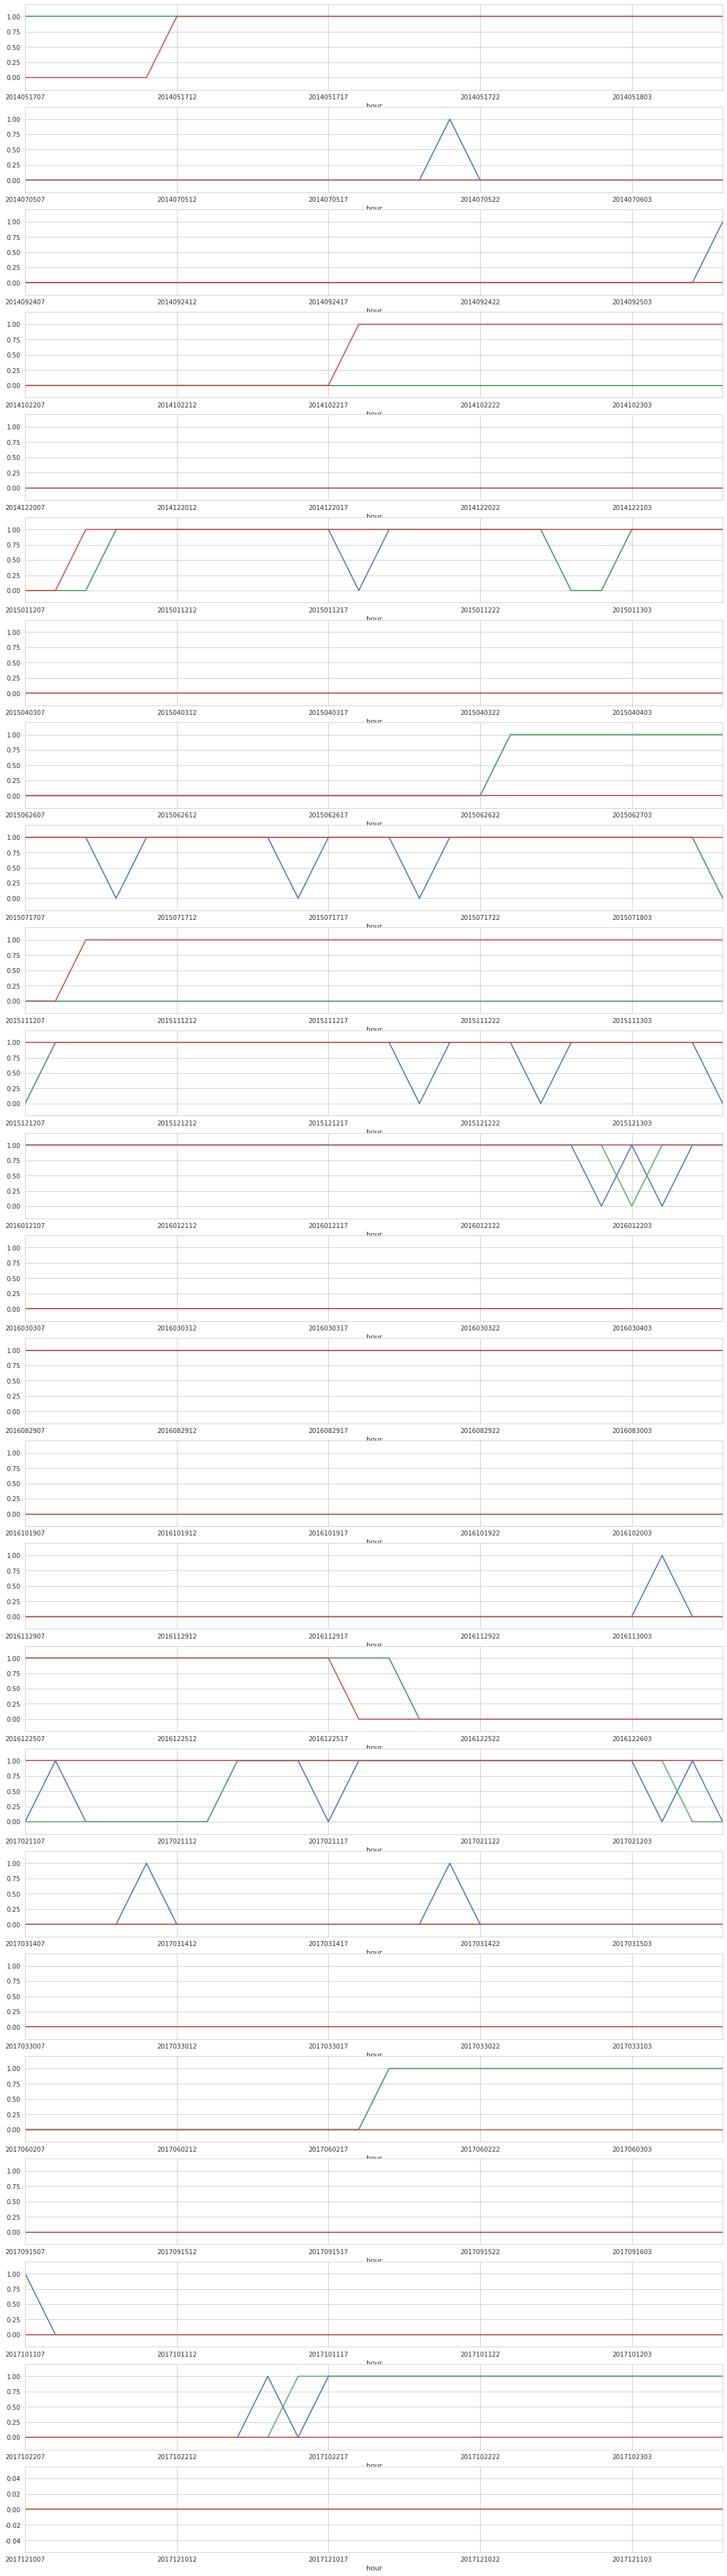

In [65]:
index = 0
for i in range(25):
    index = i*24
    plt.ylim(ymax=1.2,ymin=-0.2)
    plt.subplot(25,1,i+1)
    test.iloc[index:index+24]['pred'].plot()
    test.iloc[index:index+24]['smoth_pred'].plot()
    test.iloc[index:index+24]['swell(t+1)'].apply(lambda x:1 if x==2 else 0).plot()
    

In [66]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
0        600 non-null int64
1        600 non-null float64
swell    600 non-null int64
dtypes: float64(1), int64(2)
memory usage: 14.1 KB


In [67]:
index=24
test.iloc[index:index+24].T

hour,2014070507,2014070508,2014070509,2014070510,2014070511,2014070512,2014070513,2014070514,2014070515,2014070516,...,2014070521,2014070522,2014070523,2014070600,2014070601,2014070602,2014070603,2014070604,2014070605,2014070606
index,4368.0,4369.0,4370.0,4371.0,4372.0,4373.0,4374.0,4375.0,4376.0,4377.0,...,4382.0,4383.0,4384.0,4385.0,4386.0,4387.0,4388.0,4389.0,4390.0,4391.0
22105_파주기(sec),7.1,5.8,7.1,7.1,6.4,6.4,6.4,7.1,6.4,6.4,...,6.4,6.4,6.4,5.8,7.1,6.4,6.4,6.4,6.4,6.4
22106_파주기(sec),7.1,6.4,6.4,7.1,7.1,7.1,7.1,7.1,7.1,7.1,...,6.4,7.1,7.1,6.4,6.4,7.1,6.4,6.4,6.4,7.1
21229_파주기(sec),6.4,5.8,6.4,6.4,5.8,6.4,6.4,6.4,6.4,6.4,...,6.4,6.4,5.8,6.4,5.8,6.4,6.4,5.8,6.4,6.4
swell(t+1),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
smoth_pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
eval_metric = evaluation(df['swell(t+1)'].apply(output_change))

In [72]:
scores = []
for day in range(25):
    st = day*24
    print(st)
    scores.append(eval_metric.evaluate(test['smoth_pred'][st:st + 24]))
    
ori_scores = []
for day in range(25):
    st = day*24
#     print(st)
    ori_scores.append(eval_metric.evaluate(test['pred'][st:st + 24]))

print(ori_scores)
print(scores)

0
 2    18
 0     3
-1     3
dtype: int64
24
1    24
dtype: int64
48
1    24
dtype: int64
72
-2    12
 1    12
dtype: int64
96
1    24
dtype: int64
120
2    18
0     4
1     2
dtype: int64
144
1    24
dtype: int64
168
 1    16
-1     8
dtype: int64
192
2    23
1     1
dtype: int64
216
-2    21
 1     3
dtype: int64
240
2    22
0     2
dtype: int64
264
2    22
0     2
dtype: int64
288
1    24
dtype: int64
312
2    23
0     1
dtype: int64
336
1    24
dtype: int64
360
1    24
dtype: int64
384
2    11
1    11
0     2
dtype: int64
408
 2    15
-2     5
 0     3
 1     1
dtype: int64
432
1    24
dtype: int64
456
1    24
dtype: int64
480
 1    12
-1    12
dtype: int64
504
1    24
dtype: int64
528
1    24
dtype: int64
552
-1    15
 1     9
dtype: int64
576
1    24
dtype: int64
 2    18
 0     3
-1     3
dtype: int64
 1    23
-1     1
dtype: int64
 1    23
-1     1
dtype: int64
-2    12
 1    12
dtype: int64
1    24
dtype: int64
2    17
0     5
1     2
dtype: int64
1    24
dtype: int64
 1    16

In [73]:
np.sum(scores)

545